#Forming the Dataframe
The datatype conversion


1.   Gender
2.   Smoking
3.   Genetic Risk
4.   Alcohol Intake




#CANCER ANALYSIS

#Importing Libraries

In [ ]:
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

# Directory containing the Excel files
directory = '/content/drive/MyDrive/Cancer Data'

In [ ]:
# List to hold dataframes
cancer_dfs = []

# Load each Excel file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.xlsx') or filename.endswith('.xls'):
        file_path = os.path.join(directory, filename)
        df = pd.read_excel(file_path)

        if filename in ['Cancer data.xlsx', 'Cancer 2 data.xlsx']:
            # Standardize Gender column if it exists
            if 'Gender' in df.columns:
                if filename == 'Cancer data.xlsx':
                    gender_mapping = {1: 'M', 0: 'F'}
                elif filename == 'Cancer 2 data.xlsx':
                    gender_mapping = {1: 'M', 2: 'F'}
                df['Gender'] = df['Gender'].map(gender_mapping)

            # Standardize Smoking column if it exists
            if 'Smoking' in df.columns:
                if filename == 'Cancer data.xlsx':
                    smoking_mapping = {0: 'No', 1: 'Yes'}
                elif filename == 'Cancer 2 data.xlsx':
                    smoking_mapping = {1: 'No', 2: 'No', 3: 'No', 4: 'No', 5: 'No', 6: 'Yes', 7: 'Yes', 8: 'Yes', 9: 'Yes', 10: 'Yes'}
                df['Smoking'] = df['Smoking'].map(smoking_mapping)

            # Standardize Genetic Risk column if it exists
            if 'Genetic Risk' in df.columns:
                if filename == 'Cancer data.xlsx':
                    genetic_mapping = {0: 'No', 1: 'No', 2: 'Yes'}
                elif filename == 'Cancer 2 data.xlsx':
                    genetic_mapping = {1: 'No', 2: 'No', 3: 'No', 4: 'Yes', 5: 'Yes', 6: 'Yes', 7: 'Yes'}
                df['Genetic Risk'] = df['Genetic Risk'].map(genetic_mapping)

            # Standardize Alcohol Intake column if it exists
            if 'Alcohol Intake' in df.columns:
                if filename == 'Cancer data.xlsx':
                    df['Alcohol Intake'] = df['Alcohol Intake'].astype(int)
                    df['Alcohol Intake'] = df['Alcohol Intake'].apply(lambda x: 'No' if 0<x<2 else 'Yes')
                elif filename == 'Cancer 2 data.xlsx':
                    df['Alcohol Intake'] = df['Alcohol Intake'].astype(int)
                    df['Alcohol Intake'] = df['Alcohol Intake'].apply(lambda x: 'No' if 0<x<3 else 'Yes')



            # Append the dataframe to the list for Cancer data
            cancer_dfs.append(df)

# Combine all the dataframes
combined_cancer_df = pd.concat(cancer_dfs, ignore_index=True)

# Print the combined dataframe
print("Combined Cancer Data:")
print(combined_cancer_df.head())
print("\nLast few rows of Combined Cancer Data:")
print(combined_cancer_df.tail())


Combined Cancer Data:
   Age Gender Smoking Genetic Risk Alcohol Intake  BMI  PhysicalActivity  \
0   33      M      No           No            Yes  NaN               NaN   
1   17      M      No          Yes             No  NaN               NaN   
2   35      M      No          Yes            Yes  NaN               NaN   
3   37      M     Yes          Yes            Yes  NaN               NaN   
4   46      M     Yes          Yes            Yes  NaN               NaN   

   CancerHistory  Diagnosis  
0            NaN        NaN  
1            NaN        NaN  
2            NaN        NaN  
3            NaN        NaN  
4            NaN        NaN  

Last few rows of Combined Cancer Data:
      Age Gender Smoking Genetic Risk Alcohol Intake        BMI  \
2495   62      M      No           No             No  25.090025   
2496   31      F      No           No            Yes  33.447125   
2497   63      M     Yes           No            Yes  32.613861   
2498   55      F      No         

#Inputting missing values

In [ ]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['Gender', 'Smoking', 'Genetic Risk', 'Alcohol Intake', 'CancerHistory', 'Diagnosis']

for column in categorical_columns:
    if column in combined_cancer_df.columns:
        le = LabelEncoder()
        combined_cancer_df[column] = le.fit_transform(combined_cancer_df[column].astype(str))
        label_encoders[column] = le

# Initialize KNN Imputer with 5 neighbors
imputer = KNNImputer(n_neighbors=5)

# Apply the imputer to the dataframe
df_imputed = pd.DataFrame(imputer.fit_transform(combined_cancer_df), columns=combined_cancer_df.columns)

# Decode the categorical columns back to original values
for column in categorical_columns:
    if column in df_imputed.columns:
        le = label_encoders[column]
        df_imputed[column] = le.inverse_transform(df_imputed[column].astype(int))



# Print the combined dataframe
print("Combined Cancer Data:")
print(df_imputed.head())
print("\nLast few rows of Combined Cancer Data:")
print(df_imputed.tail())



Combined Cancer Data:
    Age Gender Smoking Genetic Risk Alcohol Intake        BMI  \
0  33.0      M      No           No            Yes  31.423003   
1  17.0      M      No          Yes             No  25.695442   
2  35.0      M      No          Yes            Yes  30.641311   
3  37.0      M     Yes          Yes            Yes  33.441209   
4  46.0      M     Yes          Yes            Yes  25.451210   

   PhysicalActivity CancerHistory Diagnosis  
0          5.995654           nan       nan  
1          5.525544           nan       nan  
2          7.021610           nan       nan  
3          6.012804           nan       nan  
4          5.614587           nan       nan  

Last few rows of Combined Cancer Data:
       Age Gender Smoking Genetic Risk Alcohol Intake        BMI  \
2495  62.0      M      No           No             No  25.090025   
2496  31.0      F      No           No            Yes  33.447125   
2497  63.0      M     Yes           No            Yes  32.613861   

#Exporting The Dataset

In [ ]:
file_path = 'Meta Cancer data.xlsx'
df_imputed.to_excel('Meta Cancer data.xlsx', index=False)
print(f"Combined dataset has been saved to '{file_path}'.")
from google.colab import files  # Only for Google Colab. Comment this out if not using Colab.

# Download the file
files.download(file_path)

Combined dataset has been saved to 'Meta Cancer data.xlsx'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Cancer Analysis

Importing Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
confusion_matrix(y_test, model.predict(X_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

Viewing the data

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Cancer Data/Meta Cancer data.xlsx')
df.head().T.style.set_properties(**{"background-color": "#0096c7","color": "white","border": "1.5px solid black"})


,0,1,2,3,4
Age,33.000000,17.000000,35.000000,37.000000,46.000000
Gender,1.000000,1.000000,1.000000,1.000000,1.000000
Smoking,0.000000,0.000000,0.000000,1.000000,1.000000
Genetic Risk,0.000000,1.000000,1.000000,1.000000,1.000000
Alcohol Intake,1.000000,0.000000,1.000000,1.000000,1.000000
BMI,31.423003,25.695442,30.641311,33.441209,25.451210
PhysicalActivity,5.995654,5.525544,7.021610,6.012804,5.614587
CancerHistory,2.000000,2.000000,2.000000,2.000000,2.000000
Diagnosis,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
cancer = df.drop(['Diagnosis'], axis=1)
cancer.head().T.style.set_properties(**{"background-color": "#0096c7","color": "white","border": "1.5px solid black"})

,0,1,2,3,4
Age,33.000000,17.000000,35.000000,37.000000,46.000000
Gender,1.000000,1.000000,1.000000,1.000000,1.000000
Smoking,0.000000,0.000000,0.000000,1.000000,1.000000
Genetic Risk,0.000000,1.000000,1.000000,1.000000,1.000000
Alcohol Intake,1.000000,0.000000,1.000000,1.000000,1.000000
BMI,31.423003,25.695442,30.641311,33.441209,25.451210
PhysicalActivity,5.995654,5.525544,7.021610,6.012804,5.614587
CancerHistory,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
cancer.dropna(inplace=True)

In [ ]:
cancer.shape

(2500, 8)

Datatype

In [ ]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               2500 non-null   int64  
 1   Gender            2500 non-null   int64  
 2   Smoking           2500 non-null   int64  
 3   Genetic Risk      2500 non-null   int64  
 4   Alcohol Intake    2500 non-null   int64  
 5   BMI               2500 non-null   float64
 6   PhysicalActivity  2500 non-null   float64
 7   CancerHistory     2500 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 156.4 KB


In [ ]:
cancer.describe().T.style.set_properties(**{"background-color": "#0096c7","color": "white","border": "1.5px solid black"})

,count,mean,std,min,25%,50%,75%,max
Age,2500.000000,45.061600,16.905127,14.000000,32.000000,44.000000,58.000000,80.000000
Gender,2500.000000,0.533600,0.498970,0.000000,0.000000,1.000000,1.000000,1.000000
Smoking,2500.000000,0.304000,0.460075,0.000000,0.000000,0.000000,1.000000,1.000000
Genetic Risk,2500.000000,0.293200,0.455320,0.000000,0.000000,0.000000,1.000000,1.000000
Alcohol Intake,2500.000000,0.736400,0.440673,0.000000,0.000000,1.000000,1.000000,1.000000
BMI,2500.000000,28.110135,5.947630,15.000291,24.224164,28.613237,32.381574,39.958688
PhysicalActivity,2500.000000,4.994902,2.329983,0.002410,3.509092,5.074760,6.236522,9.994607
CancerHistory,2500.000000,0.886400,0.949239,0.000000,0.000000,0.000000,2.000000,2.000000


In [ ]:
cancer.isnull().sum()

,0
Age,0
Gender,0
Smoking,0
Genetic Risk,0
Alcohol Intake,0
BMI,0
PhysicalActivity,0
CancerHistory,0


<Axes: ylabel='Age'>

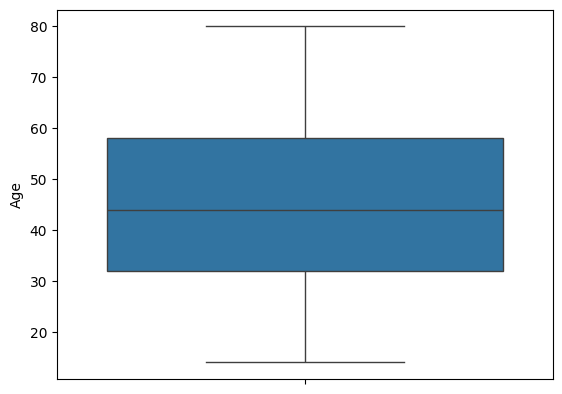

In [ ]:
sns.boxplot(cancer['Age'])

In [ ]:
corr = cancer.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Gender,Smoking,Genetic Risk,Alcohol Intake,BMI,PhysicalActivity,CancerHistory
Age,1.000000,0.020723,-0.011515,-0.168759,0.116809,0.010811,0.017397,-0.367605
Gender,0.020723,1.000000,0.105397,0.138919,0.110362,0.012429,0.044262,0.102686
Smoking,-0.011515,0.105397,1.000000,0.265845,0.148693,0.006196,-0.034327,0.091936
Genetic Risk,-0.168759,0.138919,0.265845,1.000000,0.241752,0.079816,0.032156,0.479839
Alcohol Intake,0.116809,0.110362,0.148693,0.241752,1.000000,0.018838,0.005850,-0.151972
BMI,0.010811,0.012429,0.006196,0.079816,0.018838,1.000000,0.036344,0.114846
PhysicalActivity,0.017397,0.044262,-0.034327,0.032156,0.005850,0.036344,1.000000,0.053797
CancerHistory,-0.367605,0.102686,0.091936,0.479839,-0.151972,0.114846,0.053797,1.000000


In [ ]:
teenagers = cancer[(cancer['Age'] > 0) & (cancer['Age'] < 19)]

In [ ]:
Adult = cancer[(cancer['Age'] > 18) & (cancer['Age'] < 30)]

In [ ]:
MiddleAge = cancer[(cancer['Age'] > 30) & (cancer['Age'] < 60)]

In [ ]:
Elderly = cancer[(cancer['Age'] > 60) & (cancer['Age'] < 80)]

In [ ]:
cancer['teenagers'] = teenagers['Age']
cancer['Adult'] = Adult['Age']
cancer['MiddleAge'] = MiddleAge['Age']
cancer['Elderly'] = Elderly['Age']
cancer.to_csv('new_with_teenagers.csv', index=False)
cancer.head().T.style.set_properties(**{"background-color": "#0096c7","color": "white","border": "1.5px solid black"})

,0,1,2,3,4
Age,33.000000,17.000000,35.000000,37.000000,46.000000
Gender,1.000000,1.000000,1.000000,1.000000,1.000000
Smoking,0.000000,0.000000,0.000000,1.000000,1.000000
Genetic Risk,0.000000,1.000000,1.000000,1.000000,1.000000
Alcohol Intake,1.000000,0.000000,1.000000,1.000000,1.000000
BMI,31.423003,25.695442,30.641311,33.441209,25.451210
PhysicalActivity,5.995654,5.525544,7.021610,6.012804,5.614587
CancerHistory,2.000000,2.000000,2.000000,2.000000,2.000000
teenagers,nan,17.000000,nan,nan,nan
Adult,nan,nan,nan,nan,nan


<ipython-input-20-cf13ceba7fb1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age', palette=['blue', 'yellow'], data=cancer)
<ipython-input-20-cf13ceba7fb1>:2: UserWarning: 
The palette list has fewer values (2) than needed (65) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Age', palette=['blue', 'yellow'], data=cancer)


<Axes: xlabel='Age', ylabel='count'>

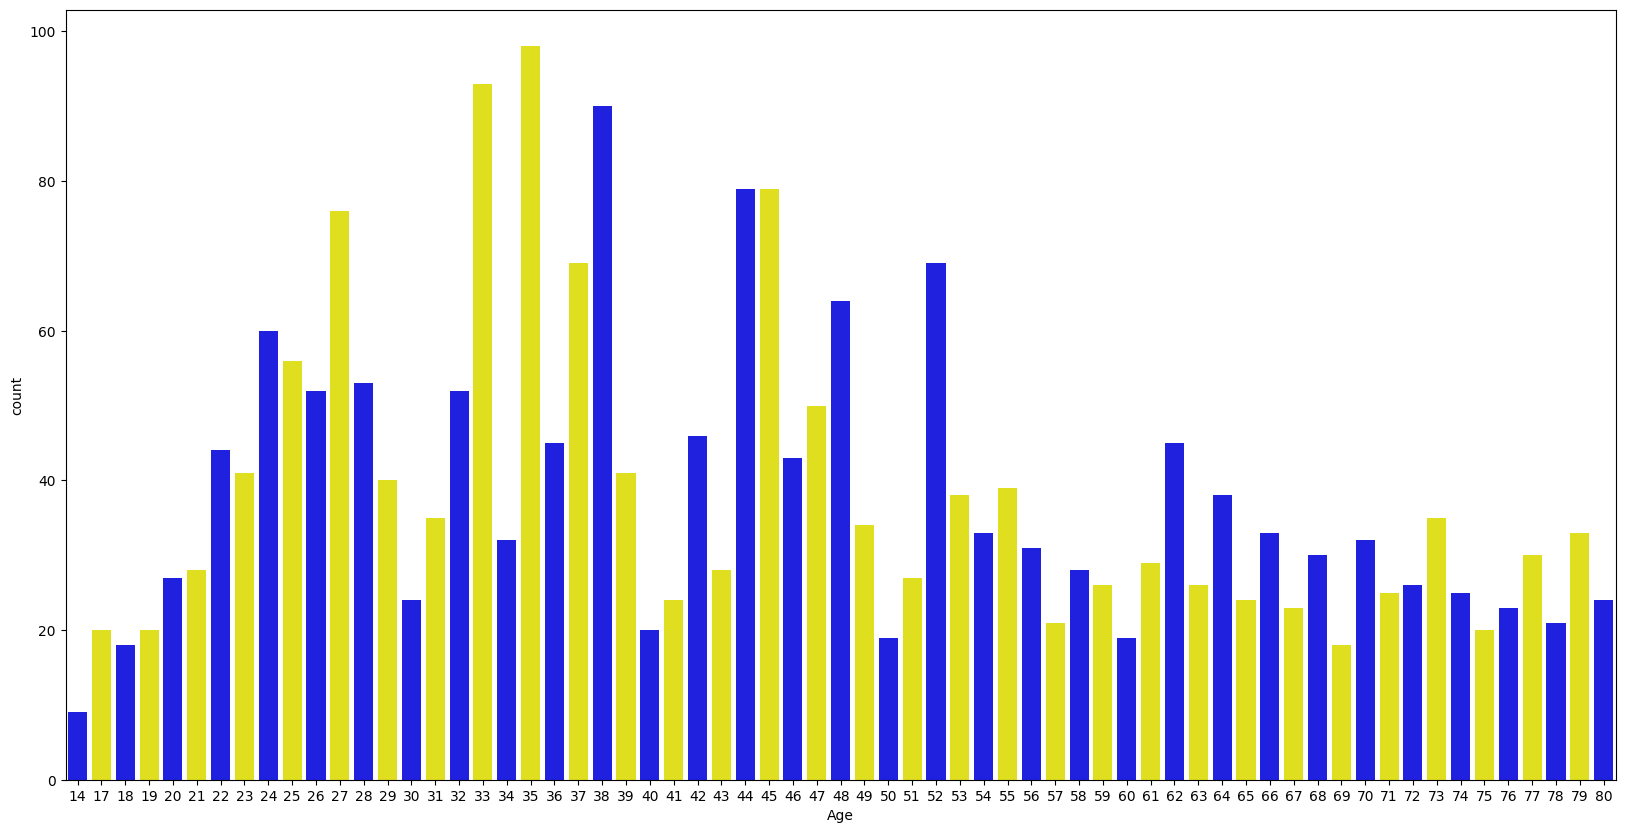

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='Age', palette=['blue', 'yellow'], data=cancer)

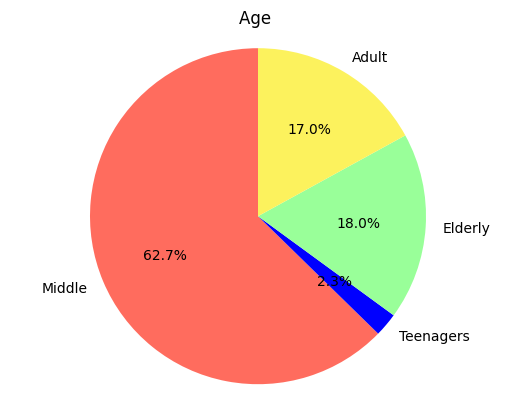

In [ ]:
ages = [ages-1 for ages in cancer['Age']]
middle_age_range = range(20, 60)
teenager_age_range = range(0,19)
adult_age_range = range(19, 30)
elderly_age_range = range(61, 100)
num_middle = sum(1 for age in ages if age in middle_age_range)
num_teenagers = sum(1 for age in ages if age in teenager_age_range)
num_elderly = sum(1 for age in ages if age in elderly_age_range)
num_adult = sum(1 for age in ages if age in adult_age_range)
total = len(ages)
percent_middle = (num_middle / total) * 100
percent_teenagers = (num_teenagers / total) * 100
percent_elderly = (num_elderly / total) * 100
percent_adult = (num_adult / total) * 100
labels = ['Middle', 'Teenagers', 'Elderly','Adult']
sizes = [percent_middle, percent_teenagers, percent_elderly,percent_adult]
colors = ['#ff6c5e', 'b', '#99ff99','#fcf25d']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title('Age ')
plt.show()

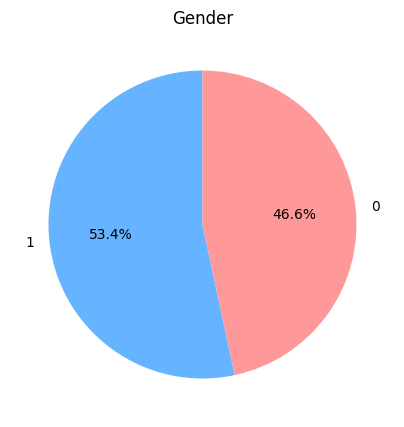

In [ ]:
plt.figure(figsize=(5,5))
cancer['Gender'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90,colors = ['#66b3ff','#ff9999'])
plt.title('Gender')
plt.ylabel('')
plt.show()

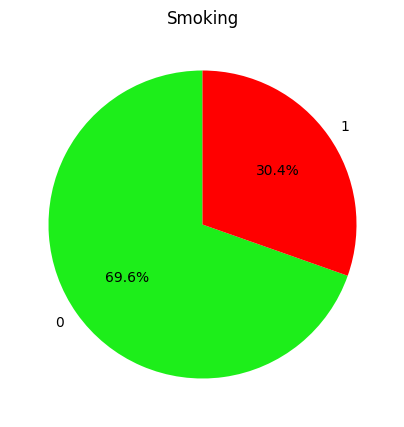

In [ ]:
plt.figure(figsize=(5,5))
cancer['Smoking'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90,colors = ['#1DEE1A','r'])
plt.title('Smoking')
plt.ylabel('')
plt.show()

<ipython-input-24-f68668275b55>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genetic Risk', palette=['#1DEE1A', 'yellow','r'], data=cancer)
<ipython-input-24-f68668275b55>:2: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x='Genetic Risk', palette=['#1DEE1A', 'yellow','r'], data=cancer)


<Axes: xlabel='Genetic Risk', ylabel='count'>

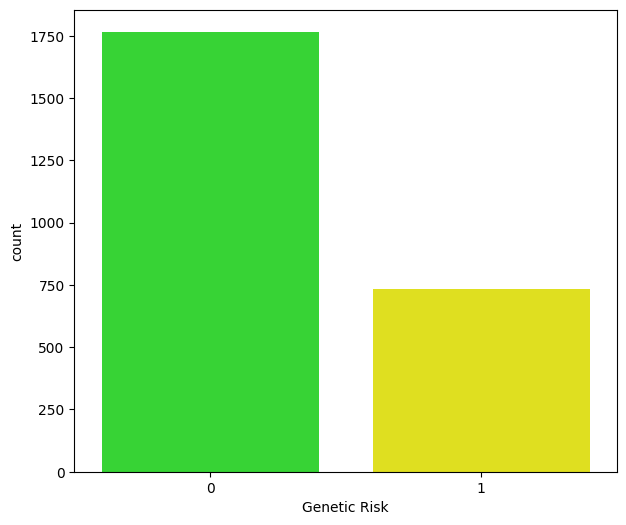

In [ ]:
plt.figure(figsize=(7,6))
sns.countplot(x='Genetic Risk', palette=['#1DEE1A', 'yellow','r'], data=cancer)

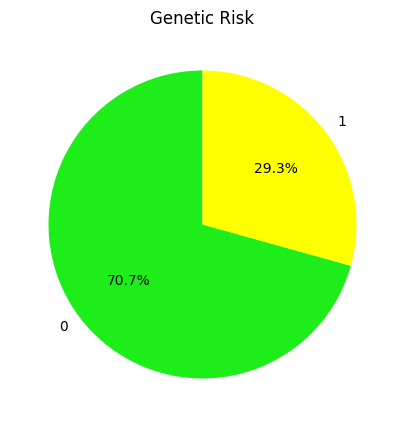

In [ ]:
plt.figure(figsize=(5,5))
cancer['Genetic Risk'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90,colors = ['#1DEE1A', 'yellow','r'])
plt.title('Genetic Risk')
plt.ylabel('')
plt.show()

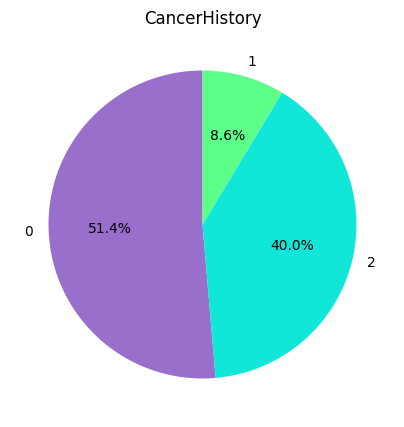

In [ ]:
plt.figure(figsize=(5,5))
cancer['CancerHistory'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90,colors = ['#986FCA','#10E7D9','#5eff89'])
plt.title('CancerHistory')
plt.ylabel('')
plt.show()

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train)

120

In [ ]:
len(X_test)

30

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

# KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
accuracy = knn.score(X_test, y_test)

In [ ]:
knn_predict= knn.predict(X_test)
knn_predict
accuracy_percentage = accuracy * 100

# Print the percentage accuracy
print(f'The accuracy of KNN Classifier is : {accuracy_percentage:.2f}%')

The accuracy of KNN Classifier is : 100.00%


#KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors=5)
knnr.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
accuracy = knnr.score(X_test, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
accuracy_percentage = accuracy * 100
print(f'The accuracy of KNN Regressor is : {accuracy_percentage:.2f}%')

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
The accuracy of KNN Regressor is : 98.86%


#Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
accuracy = rf.score(X_test, y_test)

In [ ]:
rf_predict= rf.predict(X_test)
rf_predict
accuracy_percentage = accuracy * 100

# Print the percentage accuracy
print(f'The accuracy of Random Forest Classifier is :{accuracy_percentage:.2f}%')

The accuracy of Random Forest Classifier is :100.00%


In [ ]:
from imblearn.over_sampling import SMOTE
SMOTE = SMOTE()
X_train_smote, y_train_smote = SMOTE.fit_resample(X_train, y_train)

#Logistic Regression

In [ ]:
log= LogisticRegression()
log.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = log.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
from sklearn import metrics
print(f"The accuracy of Logistic Regression is :{accuracy_score(y_test, y_pred)*100}%")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

The accuracy of Logistic Regression is :100.0%
